In [1]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, train_test_split

from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [2]:
df = pd.read_csv('data/gcj2017.csv')
# dic = {
#     "5639104758808576":"A",
#     "5686275109552128":"B",
#     "5670465267826688":"C",
#     "5658571765186560":"D",
    
#     "5708208098246656":"A",
#     "5750872826970112":"B",
#     "5759940174020608":"C",
#     "5677015495606272":"D",
    
#     "5709131113562112":"A",
#     "6346912416399360":"B",
#     "5765010517131264":"C",
#     "5743952695132160":"D",
#     "5643297854849024":"E"
# }
# df['problem_num_hash'].map(dic) 

###  vars

In [3]:
RS = 42

finalists = df[df['finalist']==True].username.unique()
semi_finalists = df[df['semi_finalist']==True].username.unique()
only_semi_finalists = np.setdiff1d(semi_finalists, finalists)

not_to_normalize = ['round', 'username', 'flines', 'round_name', 'problem_num_hash', 'finalist', 'semi_finalist','file_length_in_char'] ## these two not normalizable

# rounds = ['qualification_round', 'round_1A', 'round_1B', 'round_1C', 'round_2', 'round_3', 'final_round']
rounds = ['qualification_round', 'round_2', 'round_3']

cols_to_drop = ['round', 'round_name', 'problem_num_hash', 'finalist', 'semi_finalist', 'flines', 'file_length_in_char']
cols_to_norm = [e for e in list(df.columns) if e not in not_to_normalize]

### t-SNE

qualification_round 5633382285312000


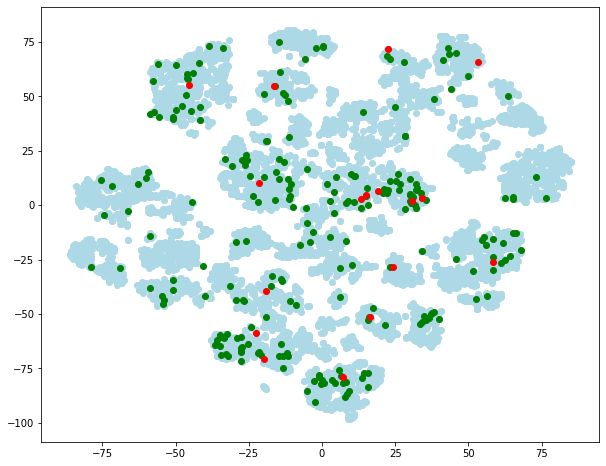

qualification_round 5719854539603968


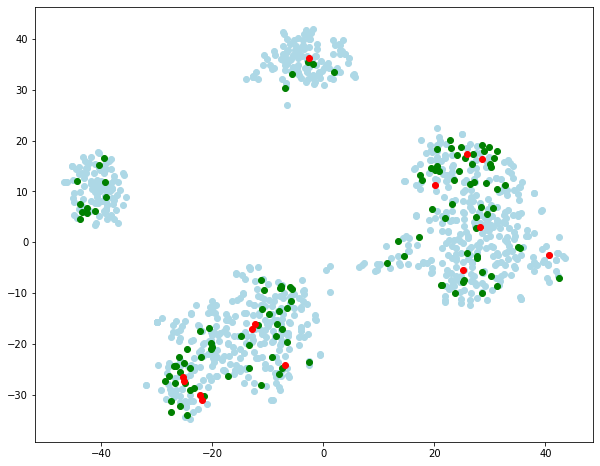

qualification_round 5736519012712448


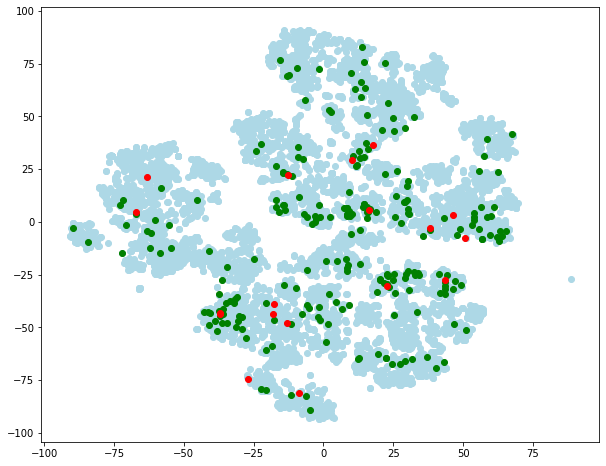

qualification_round 5654742835396608


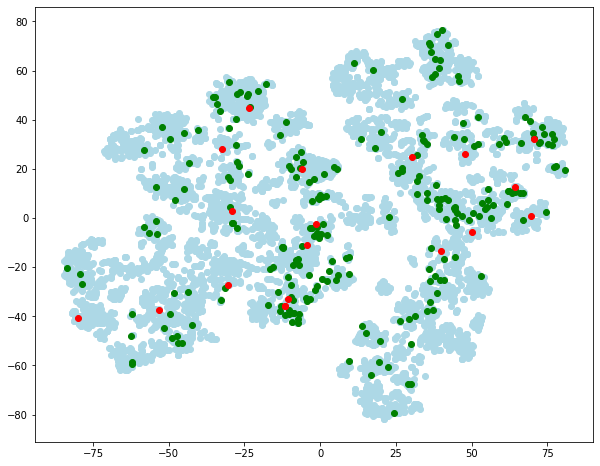

round_2 5700919488413696


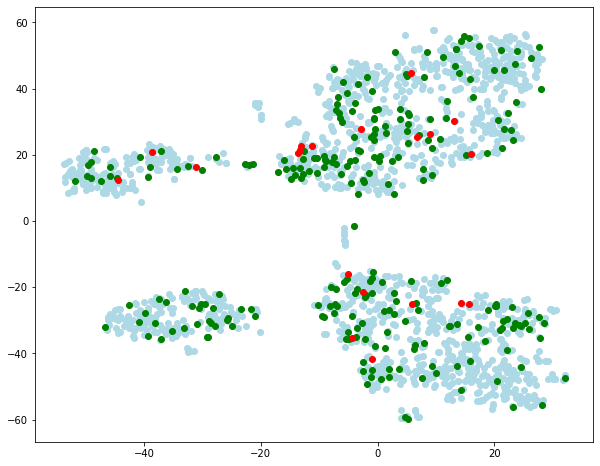

round_2 5687148430753792


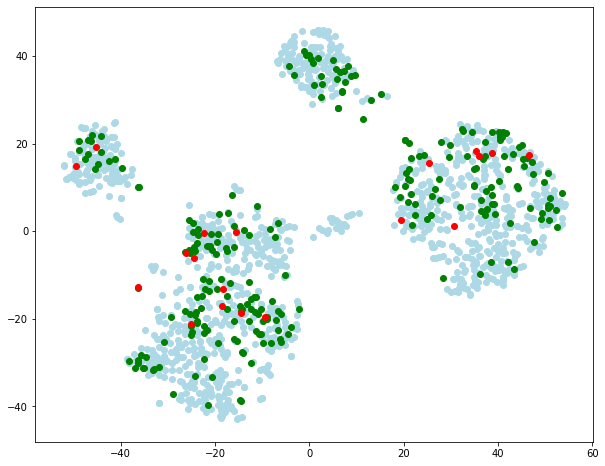

round_2 5715646612504576


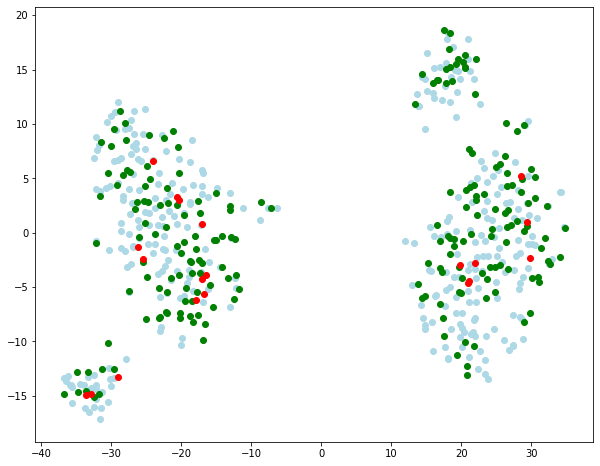

round_2 5756983256809472


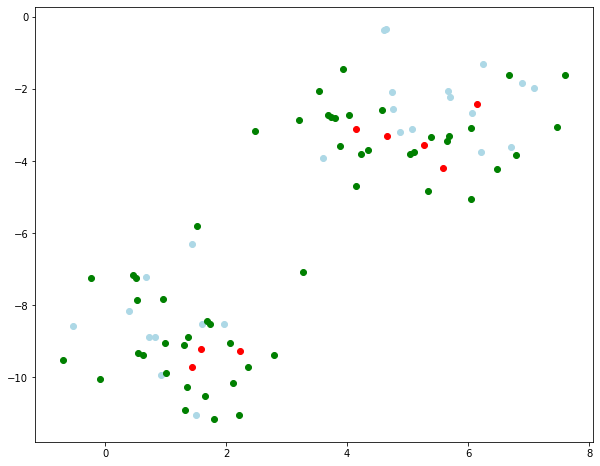

round_3 5965456674390016


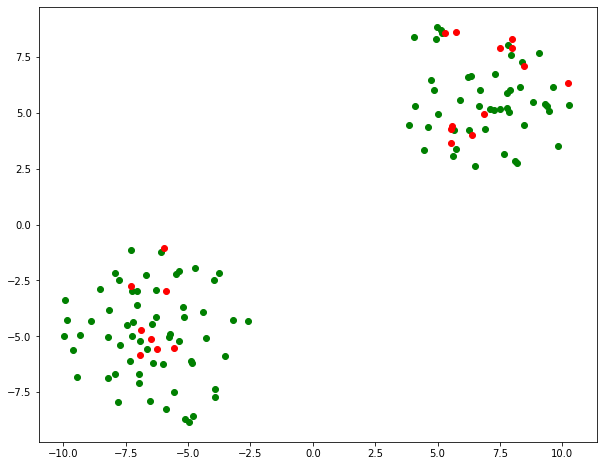

round_3 5672542102618112


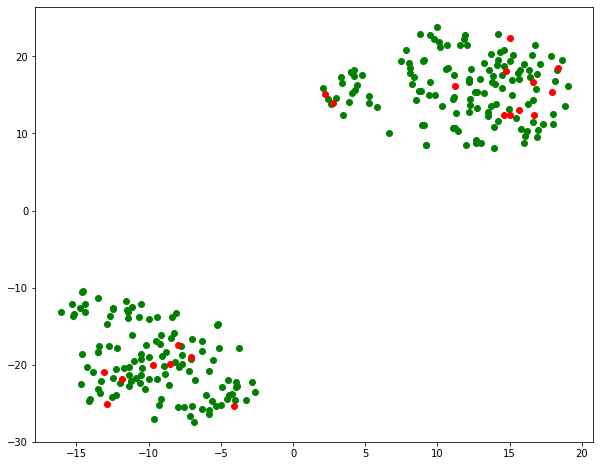

round_3 6450220019744768


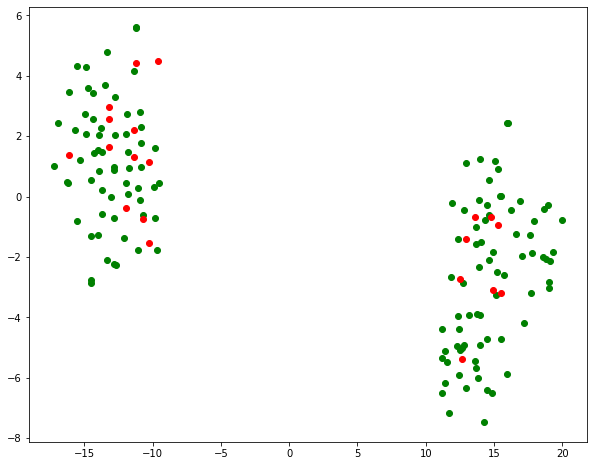

round_3 5683362198978560


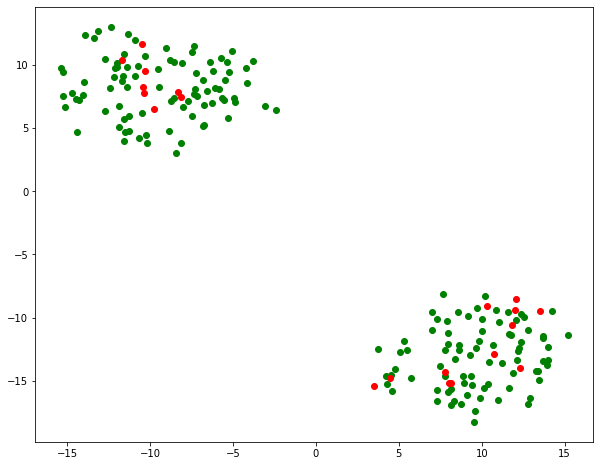

In [4]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']
        
        df_tsne = TSNE(random_state=RS).fit_transform(x)
        x_tsne = df_tsne[:,0]
        y_tsne = df_tsne[:,1]
        plt.figure(figsize=(10,8))
        
        finalist_x = []
        finalist_y = []
        semi_fin_x = []
        semi_fin_y = []
        
        for _x,_y,name in zip(x_tsne, y_tsne, y):
            if name in finalists:
                finalist_x.append(_x)
                finalist_y.append(_y)
            elif name in semi_finalists:
                semi_fin_x.append(_x)
                semi_fin_y.append(_y)
            else:
                plt.scatter(x=_x, y=_y, alpha=1, c='lightblue')
        
        plt.scatter(x=semi_fin_x, y=semi_fin_y, alpha=1, c='green')
        plt.scatter(x=finalist_x, y=finalist_y, alpha=1, c='red')
        
        print(str(r)+' '+str(p))
        plt.show()
        

### PCA

qualification_round 5633382285312000


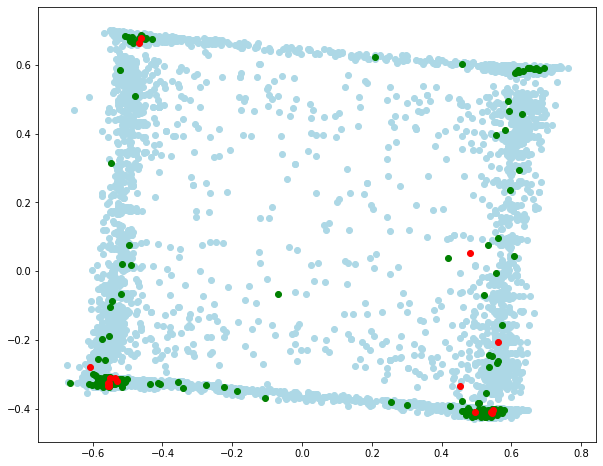

qualification_round 5719854539603968


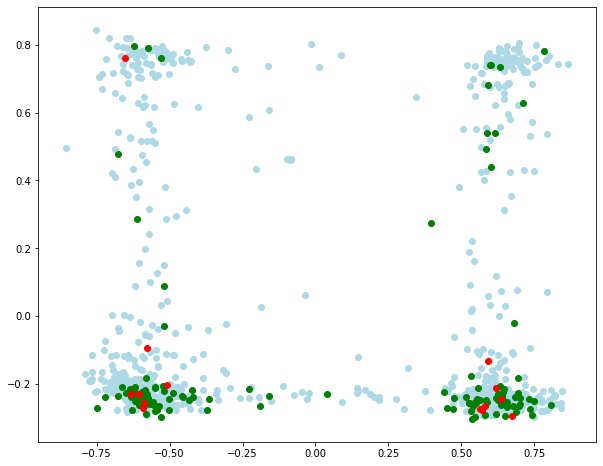

qualification_round 5736519012712448


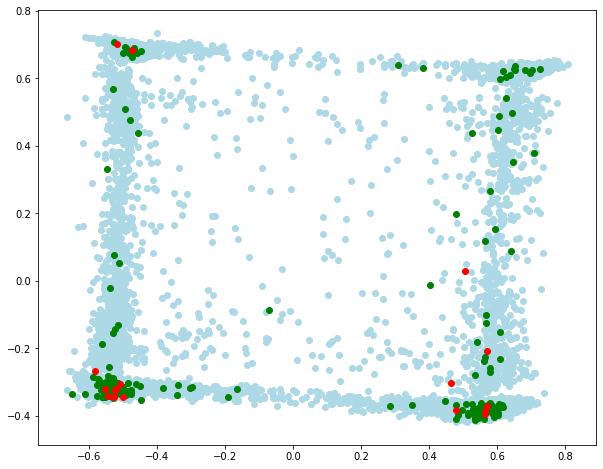

qualification_round 5654742835396608


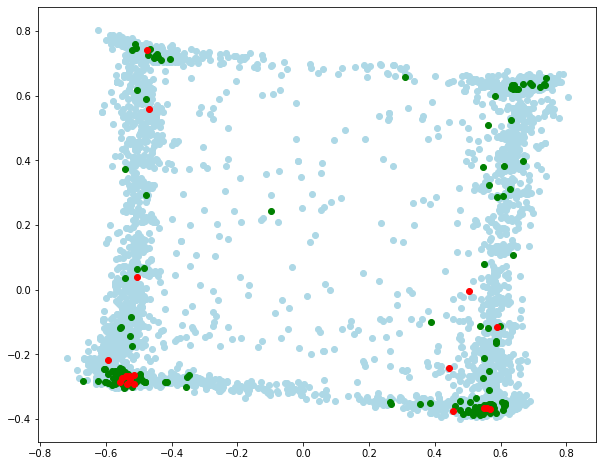

round_2 5700919488413696


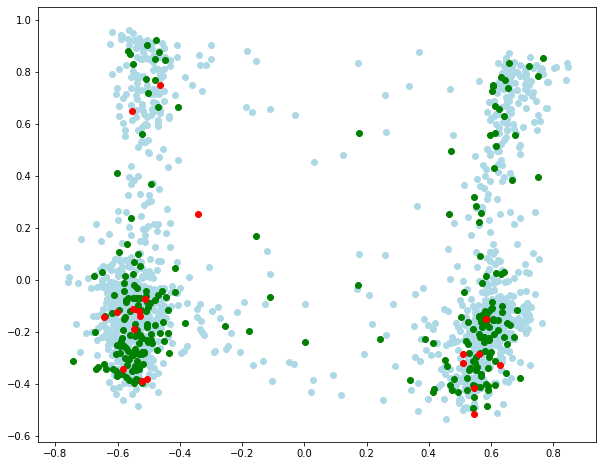

round_2 5687148430753792


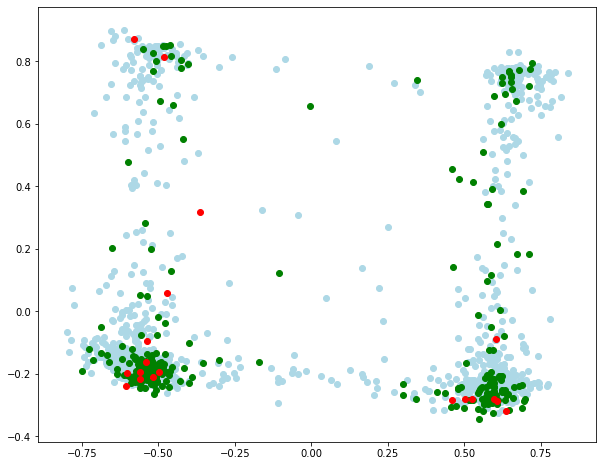

round_2 5715646612504576


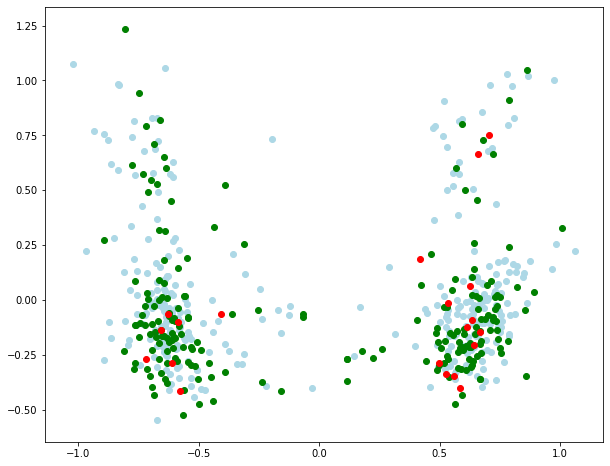

round_2 5756983256809472


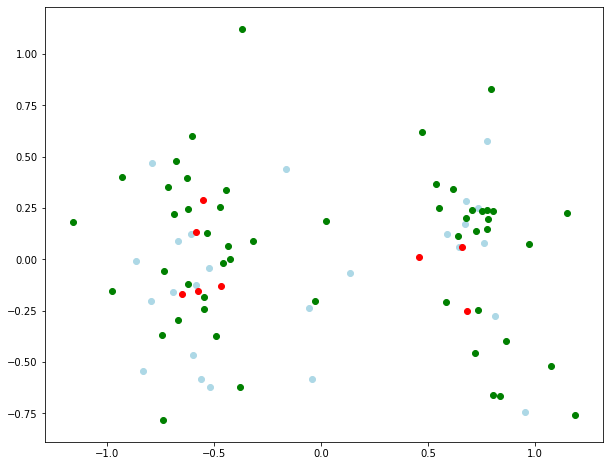

round_3 5965456674390016


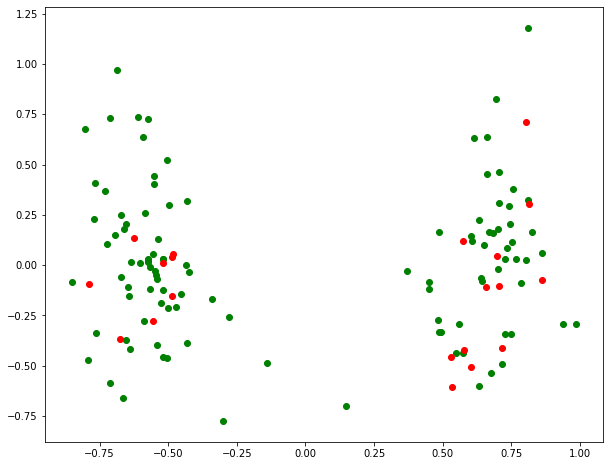

round_3 5672542102618112


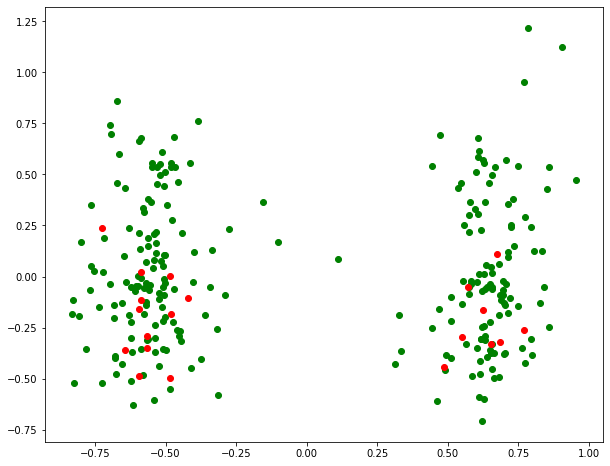

round_3 6450220019744768


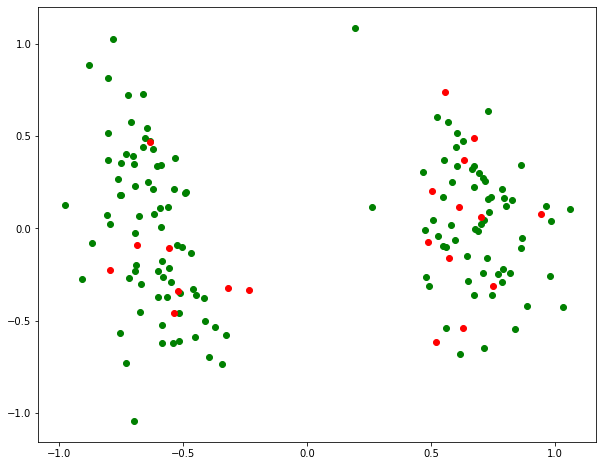

round_3 5683362198978560


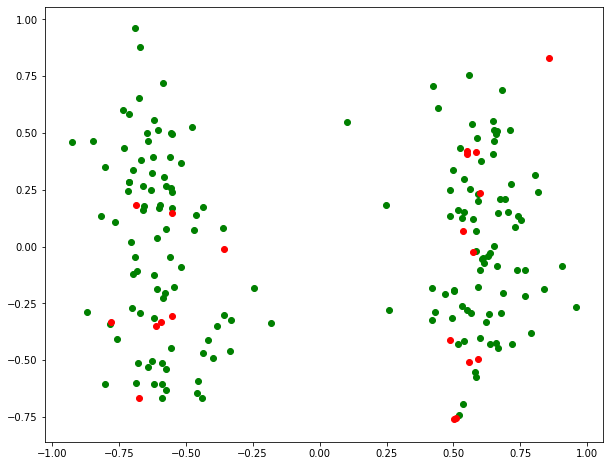

In [5]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']
        
        pca = PCA(n_components=2)
        pca.fit(x)
        pca_2d = pca.transform(x)

        df_2d = pd.DataFrame(pca_2d)
        df_2d.index = x.index
        df_2d.columns = ['PC1','PC2']
        
        x_pca = df_2d['PC1']
        y_pca= df_2d['PC2']
        
        plt.figure(figsize=(10,8))
        
        finalist_x = []
        finalist_y = []
        semi_fin_x = []
        semi_fin_y = []
        
        for _x,_y,name in zip(x_pca, y_pca, y):
            if name in finalists:
                finalist_x.append(_x)
                finalist_y.append(_y)
            elif name in semi_finalists:
                semi_fin_x.append(_x)
                semi_fin_y.append(_y)
            else:
                plt.scatter(x=_x, y=_y, alpha=1, c='lightblue')
        
        plt.scatter(x=semi_fin_x, y=semi_fin_y, alpha=1, c='green')
        plt.scatter(x=finalist_x, y=finalist_y, alpha=1, c='red')
        
        print(str(r)+' '+str(p))
        plt.show()
        

## K means Elbow method

qualification_round 5633382285312000


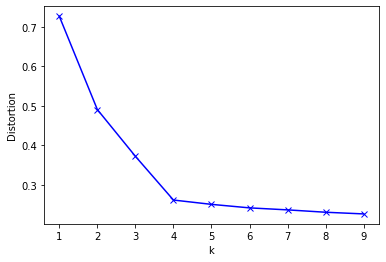

qualification_round 5719854539603968


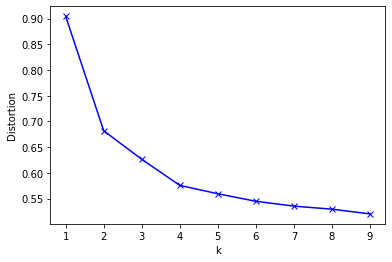

qualification_round 5736519012712448


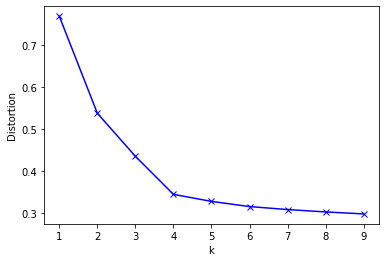

qualification_round 5654742835396608


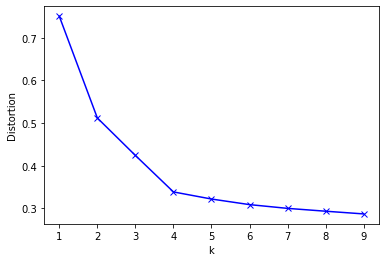

round_2 5700919488413696


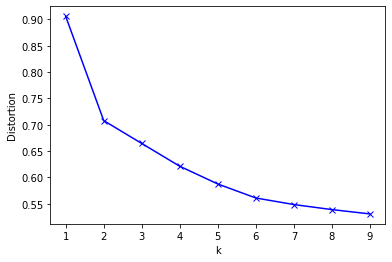

round_2 5687148430753792


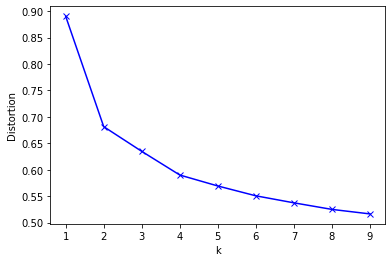

round_2 5715646612504576


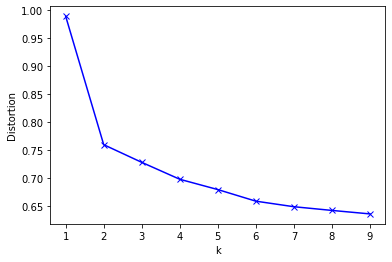

round_2 5756983256809472


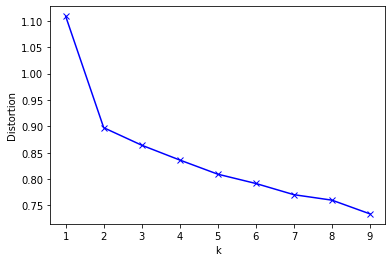

round_3 5965456674390016


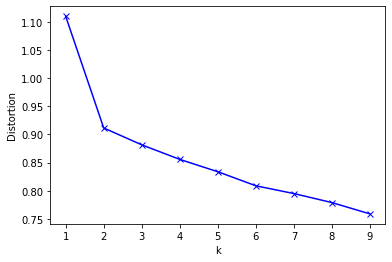

round_3 5672542102618112


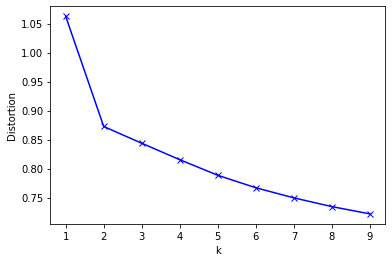

round_3 6450220019744768


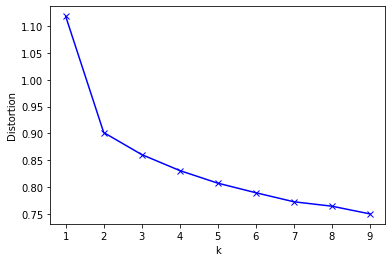

round_3 5683362198978560


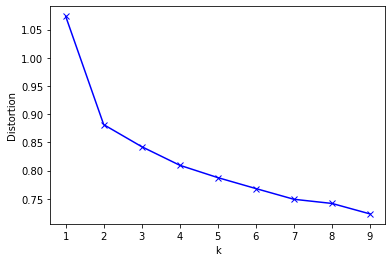

In [4]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']

        distortions = []
        K = range(1,10)
        for k in K:
            kmeanModel = KMeans(n_clusters=k).fit(x)
            kmeanModel.fit(x)
            distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

        print(r, p)
        # Plot the elbow
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.show()

## HAC

qualification_round 5633382285312000


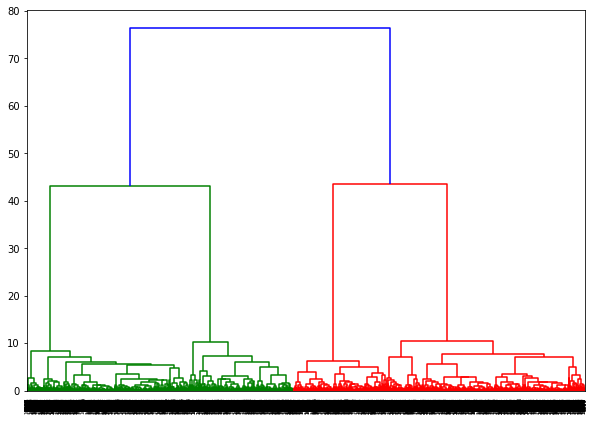

qualification_round 5719854539603968


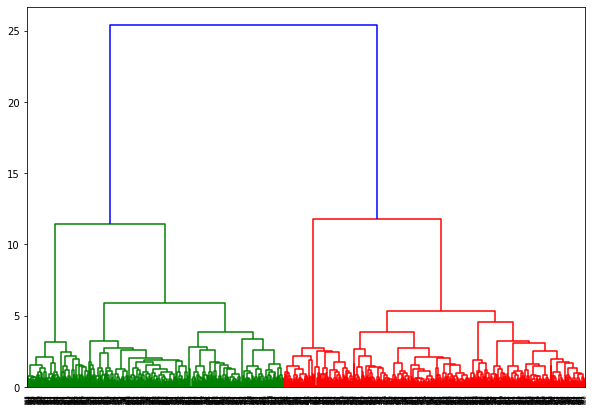

qualification_round 5736519012712448


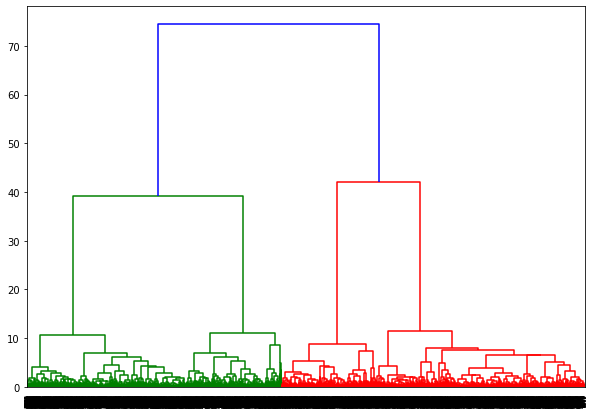

qualification_round 5654742835396608


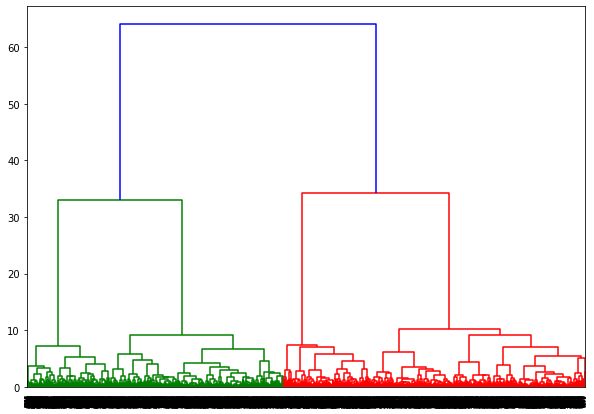

round_2 5700919488413696


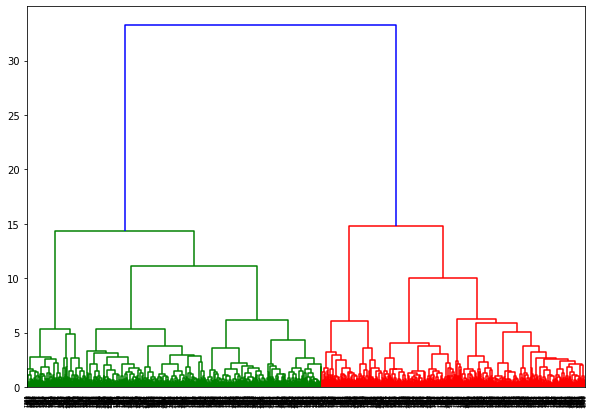

round_2 5687148430753792


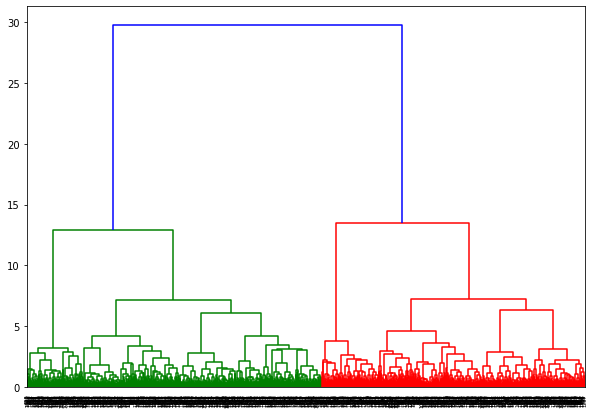

round_2 5715646612504576


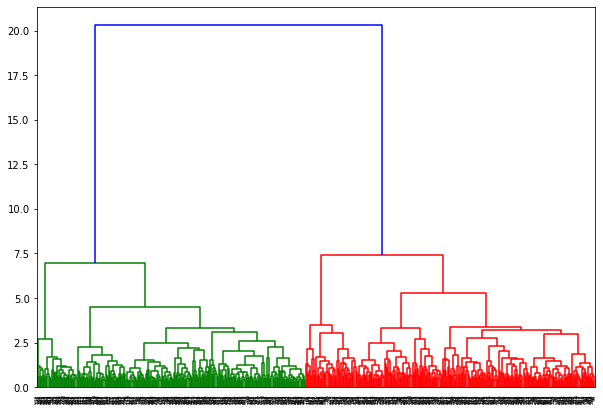

round_2 5756983256809472


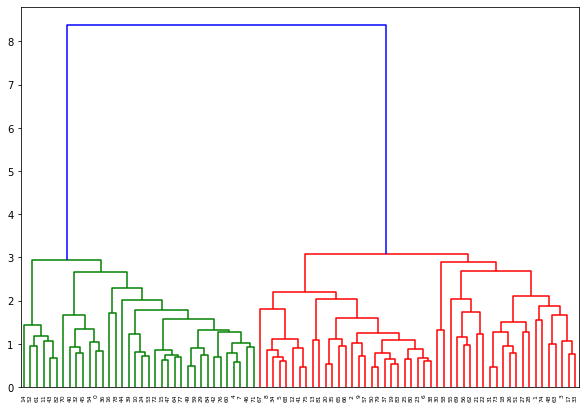

round_3 5965456674390016


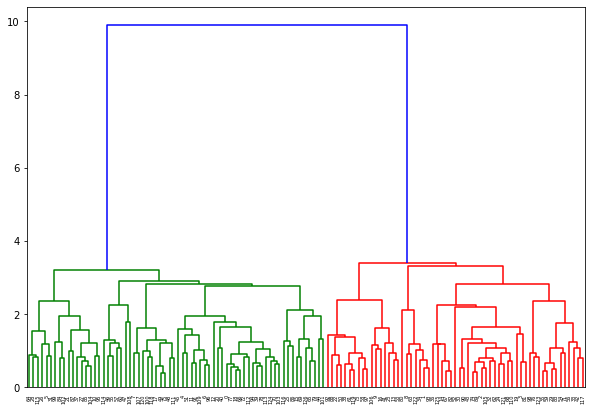

round_3 5672542102618112


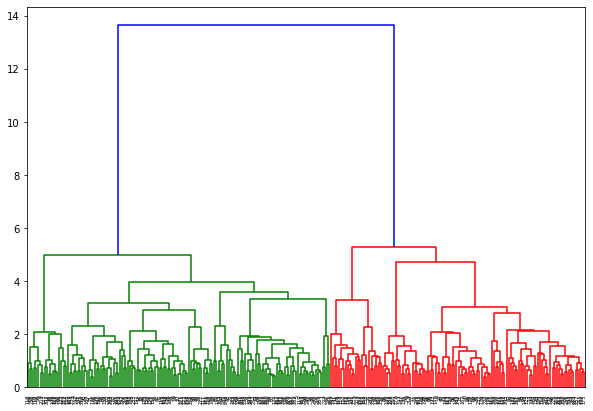

round_3 6450220019744768


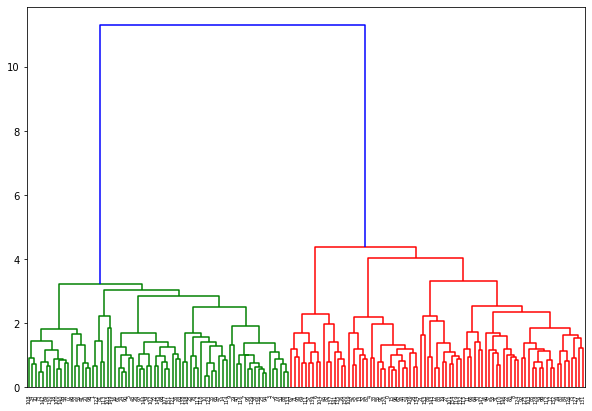

round_3 5683362198978560


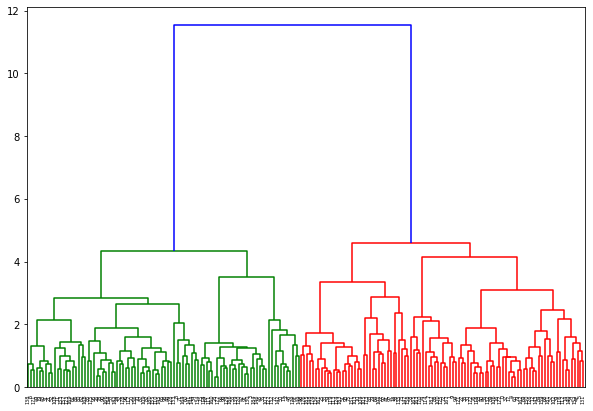

In [6]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']

        linked = linkage(x, 'ward')

        plt.figure(figsize=(10, 7))
        dendrogram(linked,
                    orientation='top',
                    distance_sort='descending',
                    show_leaf_counts=True)
        print(str(r)+' '+str(p))
        plt.show()

### Gap statistic

In [45]:
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

optimalK = OptimalK(parallel_backend='rust')
# optimalK

for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']

        n_clusters = optimalK(x.values, cluster_array=np.arange(1, 10))
        print('Optimal clusters: ', n_clusters)

Optimal clusters:  8
Optimal clusters:  3
Optimal clusters:  9
Optimal clusters:  1
Optimal clusters:  6
Optimal clusters:  9
Optimal clusters:  3
Optimal clusters:  7
Optimal clusters:  7
Optimal clusters:  8
Optimal clusters:  8
Optimal clusters:  9
Optimal clusters:  2


## Feature Importance of Cluster

### RF

In [6]:
from collections import Counter

feature_dic = {}
counter = 0
for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        counter += 1
        
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']
        
        km = KMeans(n_clusters=4, init='random', n_init=10, random_state=RS)
        km.fit(x)
        
        wwq = pd.DataFrame(np.asarray(km.cluster_centers_), columns = x.columns)
#         wwq.applymap(lambda x:f"{x:.2f}").to_csv("csv/{}.csv".format(counter))
        
        # features variance
#         x['label'] = km.labels_
#         x_mean = x.groupby('label').mean()
#         results = pd.DataFrame(columns=['Variable', 'Var'])
#         for column in x_mean.columns:
#             results.loc[len(results), :] = [column, np.var(x_mean[column])]
            
#         selected_columns = results.sort_values(
#             'Var', ascending=False,
#         ).head(10)
#         print(r, p)
#         print(selected_columns)
#         print()

        ## RF feature importance
        rf = RandomForestClassifier(n_estimators=100) 
        rf.fit(x, km.labels_) 
        feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
        for index, row in feature_importances.iterrows():
            if index in feature_dic.keys():
                feature_dic[index] += row[0]
            else:
                feature_dic[index] = row[0]
        
f_rank = pd.DataFrame(feature_dic.items(), columns=['Features', 'Importance'])
f_rank['Importance'] = f_rank['Importance']/counter
f_rank.sort_values('Importance', ascending=False) #.to_string(index=False)

,Features,Importance
0,nl_before_braces,0.302274
1,tabs_lead_lines,0.177193
2,num_tabs,0.144410
3,num_spaces,0.117724
4,white_space_ratio,0.042963
5,avg_line_length,0.034827
6,num_of_tokens,0.023494
14,occur_for,0.015044
10,num_of_uniq_tokens,0.014685
13,occur_if,0.014134


# Top Programmer Prediction

In [8]:
models = []
models.append(('Dummy',DummyClassifier(strategy='stratified')))
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

us_models = []
us_models.append(('RUSAda', RUSBoostClassifier()))
us_models.append(("BalancedRandomForest",BalancedRandomForestClassifier()))

scorers = ['precision','recall', 'f1_macro','roc_auc','balanced_accuracy']

## Unbalanced

In [9]:
from sklearn.metrics import make_scorer, precision_score

kfold = StratifiedKFold(n_splits=10, random_state=RS)

answer = []

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)
        
        for name,model in models:
            asd = np.bincount(y)
            values = [r, p, f"{asd}", name]
            result = cross_validate(model, x, y, cv=kfold,scoring=scorers)
            for sc in scorers:
                sc = f"test_{sc}"
                # print(f"{name} {sc} {result[sc].mean():.3f}")
                values.append(round(result[sc].mean(), 3))
 
            answer.append(values)

c = ['round', 'problem', 'shape', 'model']
c.extend(scorers)
answer = pd.DataFrame(answer, columns=c)
answer.groupby('model').mean().sort_values(['recall', 'f1_macro'], ascending=[False, False])

,problem,precision,recall,f1_macro,roc_auc,balanced_accuracy
model,,,,,,
DecisionTree,5700649557688320,0.260250,0.275750,0.539750,0.544125,0.544125
KNeighbors,5700649557688320,0.257500,0.221750,0.510250,0.591375,0.522000
RandomForest,5700649557688320,0.303500,0.183000,0.516125,0.675625,0.531750
Dummy,5700649557688320,0.191250,0.178000,0.480750,0.505000,0.483875
LogisticRegression,5700649557688320,0.205125,0.162750,0.490500,0.695625,0.513500
LinearSVC,5700649557688320,0.218250,0.158875,0.510500,0.701375,0.529125
SVC,5700649557688320,0.155000,0.152750,0.470000,0.637875,0.503875


## Synthetic Balance

In [10]:
answer = []
kfold = StratifiedKFold(n_splits=10, random_state=RS)

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)

        sm = SMOTE(random_state=RS)
        
        for name,model in models:
            shp = np.bincount(y)
            values = [r, p, f"{shp}", name]
            
            sm_model = Pipeline([('smote', sm), (name, model)])
            
            result = cross_validate(sm_model, x, y, cv=kfold,scoring=scorers)

            for sc in scorers:
                sc = f"test_{sc}"
                # print(f"{name} {sc} {result[sc].mean():.3f}")
                values.append(round(result[sc].mean(), 3))
 
            answer.append(values)

c = ['round', 'problem', 'shape', 'model']
c.extend(scorers)
answer = pd.DataFrame(answer, columns=c)
answer.groupby('model').mean().sort_values(['recall', 'f1_macro'], ascending=[False, False])

,problem,precision,recall,f1_macro,roc_auc,balanced_accuracy
model,,,,,,
LogisticRegression,5700649557688320,0.289750,0.668375,0.531750,0.706250,0.653125
LinearSVC,5700649557688320,0.288625,0.667500,0.529875,0.704000,0.652625
SVC,5700649557688320,0.284750,0.653375,0.531375,0.693125,0.645875
Dummy,5700649557688320,0.210125,0.500625,0.413375,0.487375,0.499750
KNeighbors,5700649557688320,0.254875,0.499000,0.501250,0.616000,0.575875
DecisionTree,5700649557688320,0.280125,0.358875,0.556000,0.576625,0.576625
RandomForest,5700649557688320,0.340875,0.295875,0.584625,0.703500,0.583375


## Undersampled models

In [11]:
kfold = StratifiedKFold(n_splits=10, random_state=RS)

answer = []

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)
        
        for name,model in us_models:
            asd = np.bincount(y)
            values = [r, p, f"{asd}", name]
            result = cross_validate(model, x, y, cv=kfold,scoring=scorers)
            for sc in scorers:
                sc = f"test_{sc}"
                # print(f"{name} {sc} {result[sc].mean():.3f}")
                values.append(round(result[sc].mean(), 3))
 
            answer.append(values)

c = ['round', 'problem', 'shape', 'model']
c.extend(scorers)
answer = pd.DataFrame(answer, columns=c)
answer.groupby('model').mean().sort_values(['recall', 'f1_macro'], ascending=[False, False])

,problem,precision,recall,f1_macro,roc_auc,balanced_accuracy
model,,,,,,
BalancedRandomForest,5700649557688320,0.288125,0.657000,0.530625,0.71125,0.655125
RUSAda,5700649557688320,0.272000,0.554625,0.530625,0.64475,0.615000


## Feature importance (Top Programmers)

### BRF

In [12]:
kfold = StratifiedKFold(n_splits=10, random_state=RS)

feature_dic = {}
counter = 0
for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        counter+=1
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)
        
        rf = BalancedRandomForestClassifier(n_estimators=100) 
        rf.fit(x, y) 
        feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
        
        for index, row in feature_importances.iterrows():
            if index in feature_dic.keys():
                feature_dic[index] += row[0]
            else:
                feature_dic[index] = row[0]
        
f_rank = pd.DataFrame(feature_dic.items(), columns=['Features', 'Importance'])
f_rank['Importance'] = f_rank['Importance']/counter
f_rank.sort_values('Importance', ascending=False)

,Features,Importance
8,num_of_uniq_tokens,0.065172
0,macros,0.061309
14,functions,0.052831
9,occur_if,0.052678
3,num_of_tokens,0.052082
6,num_empty_lines,0.048739
5,literals,0.048357
1,avg_line_length,0.048299
10,occur_for,0.046579
4,white_space_ratio,0.044875


### RFE

In [13]:
sm = SMOTE(random_state=RS)
sm_model = Pipeline([('smote', sm), ('linSVC', LinearSVC)])

feature_dic = {}
counter = 0
for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        counter+=1
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)

        x, y = sm.fit_resample(x,y)
        
        rfe = RFE(LinearSVC(), 1)
        rfe = rfe.fit(x, y)
        
        rank =  sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x.columns))
        for r, f in rank:
            if f in feature_dic.keys():
                feature_dic[f] += r
            else:
                feature_dic[f] = r
                
        
        rank =  sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x.columns))
        for r, f in rank:
            if f in feature_dic.keys():
                feature_dic[f] += r
            else:
                feature_dic[f] = r
                
f_rank = pd.DataFrame(feature_dic.items(), columns=['Features', 'Rank'])
f_rank['Rank'] = f_rank['Rank']/counter
f_rank.sort_values('Rank', ascending=True)

,Features,Rank
5,comments,13.00
1,occur_if,15.00
4,functions,18.75
21,occur_break,21.50
6,line_comments,24.50
12,literals,25.00
22,num_of_tokens,26.00
2,occur_while,26.75
17,occur_case,27.25
11,occur_elseif,27.25


## Relations


 qualification_round 5633382285312000


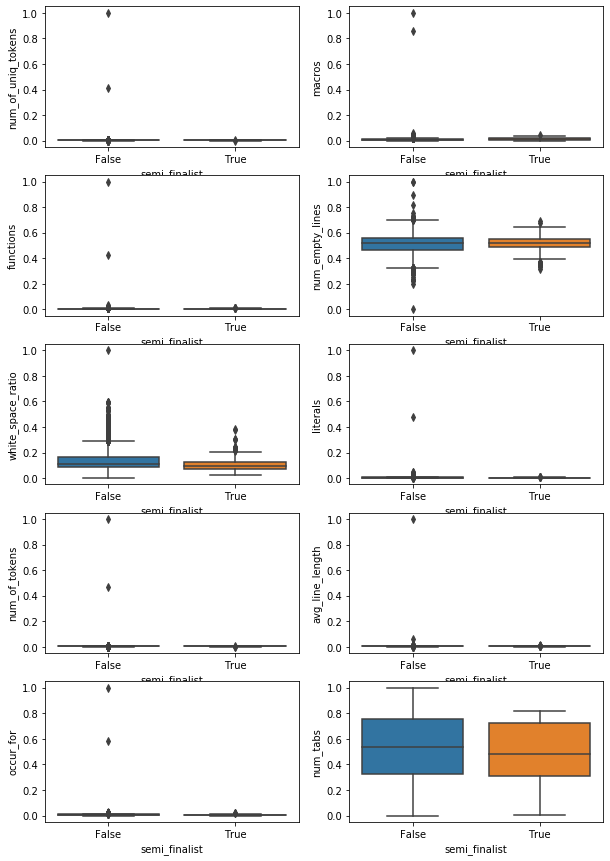


 qualification_round 5719854539603968


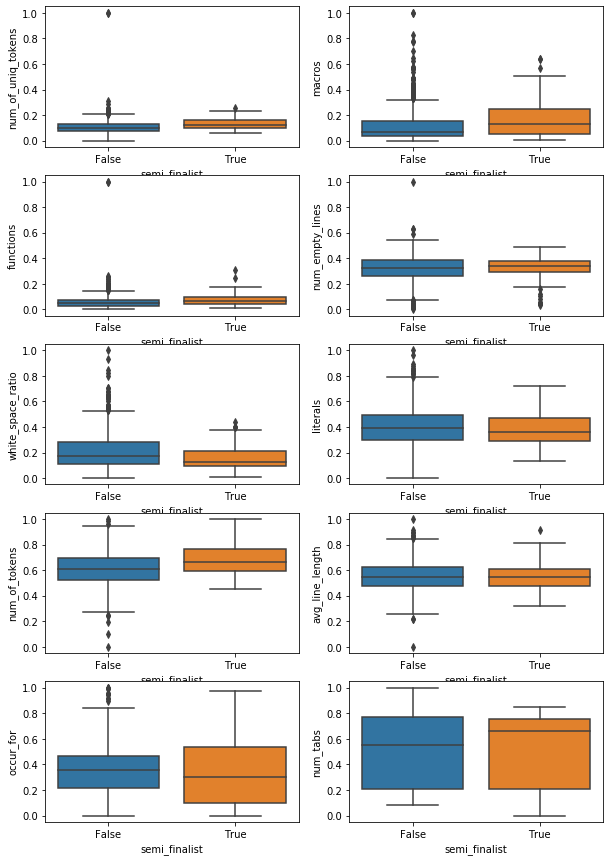


 qualification_round 5736519012712448


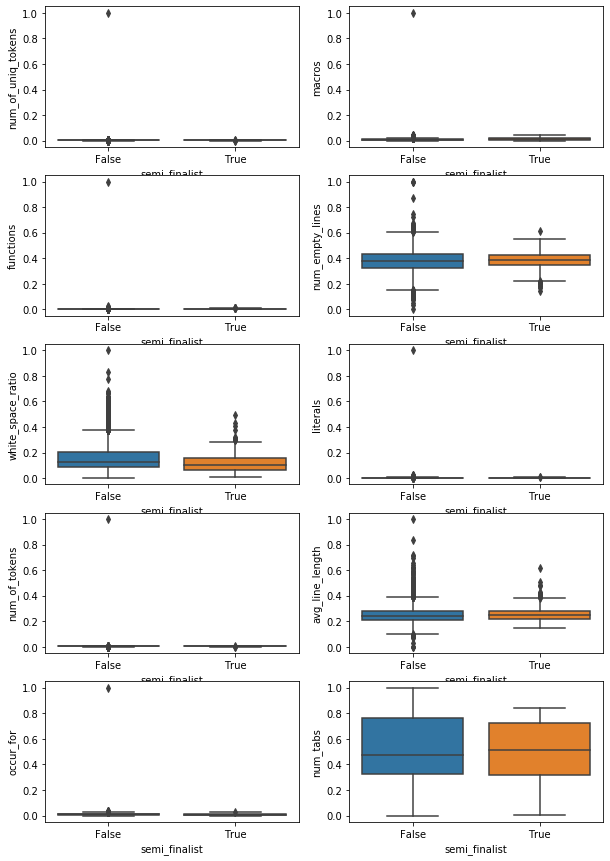


 qualification_round 5654742835396608


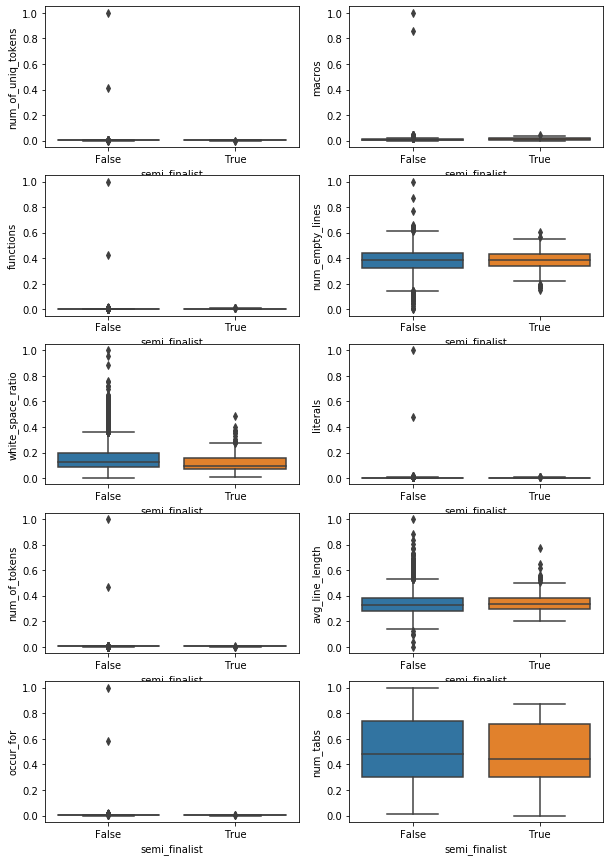


 round_2 5700919488413696


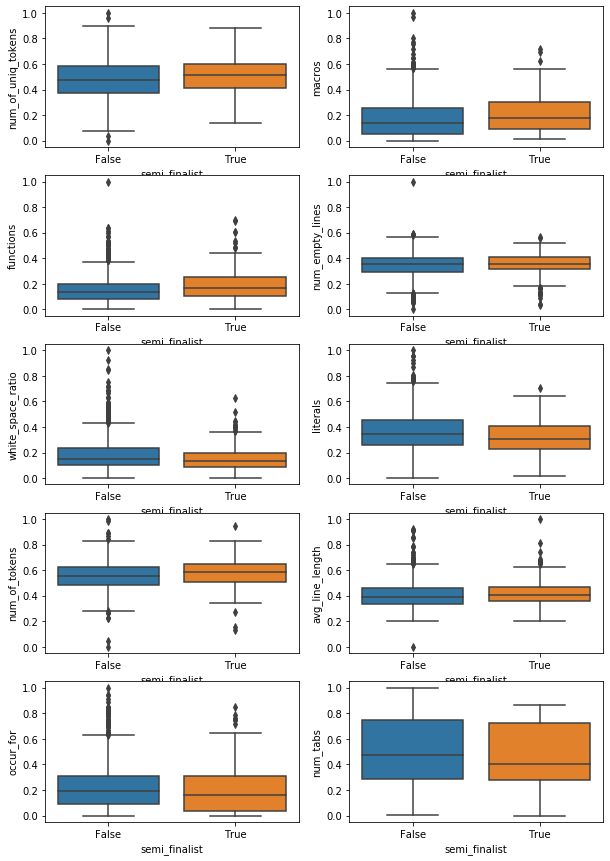


 round_2 5687148430753792


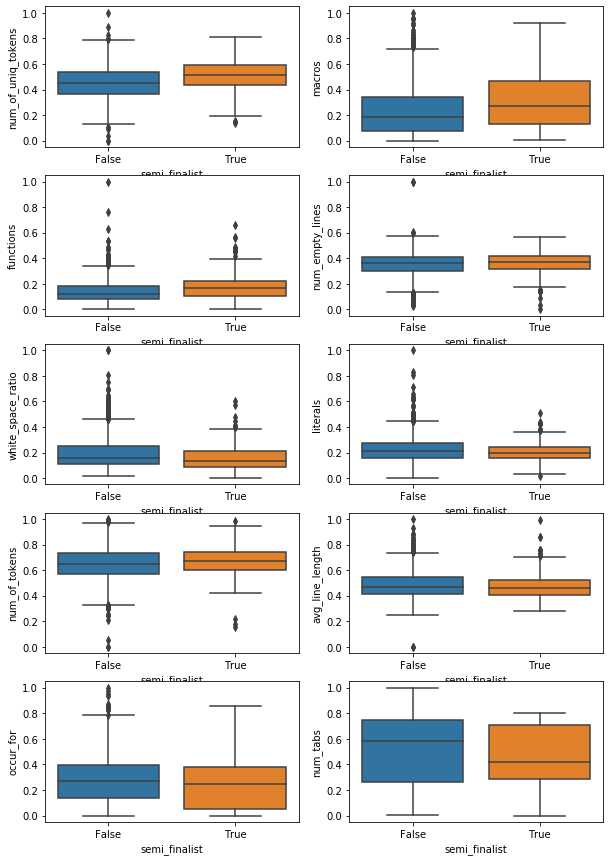


 round_2 5715646612504576


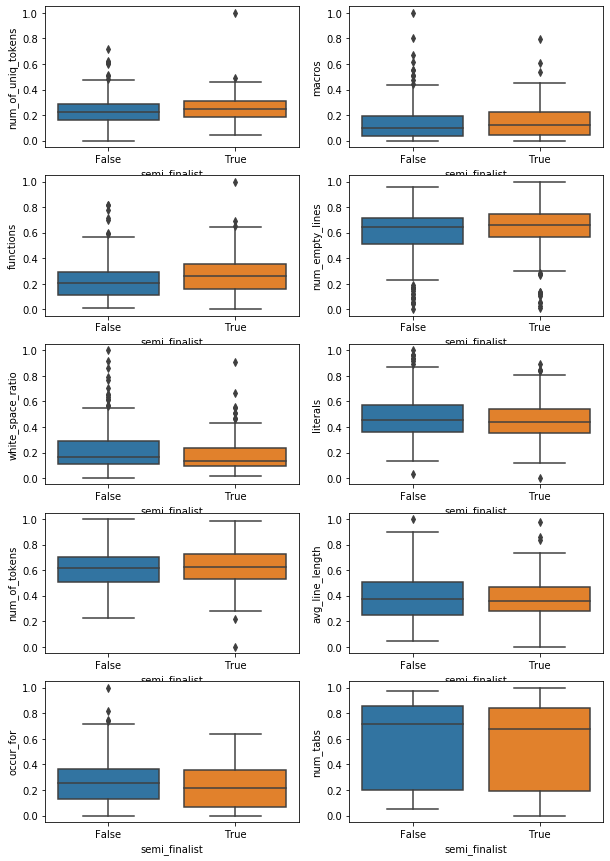


 round_2 5756983256809472


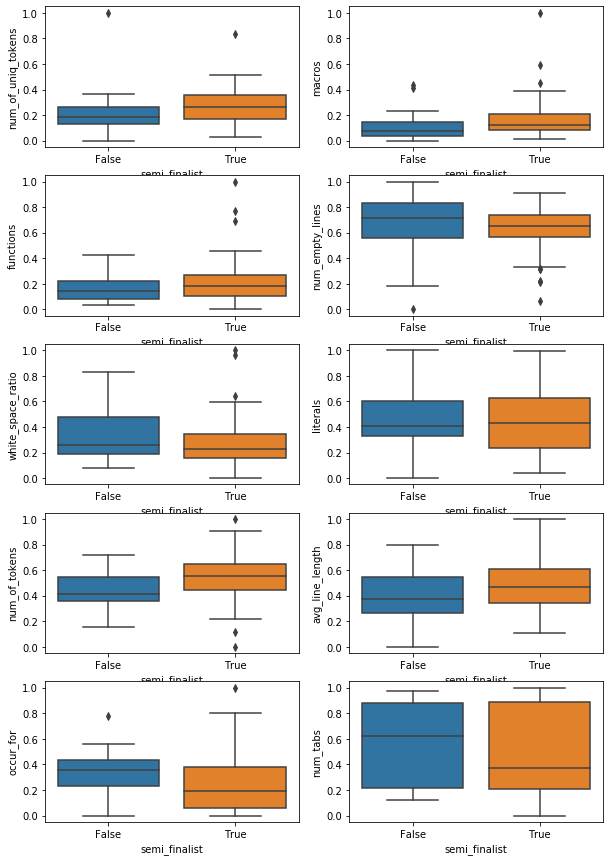

In [14]:
imp_feats = ['num_of_uniq_tokens', 'macros', 'functions', 'num_empty_lines', 'white_space_ratio',
             'literals', 'num_of_tokens', 'avg_line_length', 'occur_for', 'num_tabs']

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        print("\n", r, p)
        d = df_round[df_round['problem_num_hash']==p]
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        y = d['semi_finalist']
        
        fig, ax = plt.subplots(5,2,  figsize=(10, 15))
        for var, subplot in zip(imp_feats, ax.flatten()):
            sns.boxplot(x='semi_finalist', y=var, data=d, ax=subplot)
        plt.show()